## Cluster Analysis

This script imports the filtered data, runs tSNE reduction to 2D and cluster visualisations

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.manifold import TSNE

In [3]:
# Read in filtered data
file_path = 'data/filtered_data.csv'
df = pd.read_csv(file_path)
df.shape

(26141, 47)

In [4]:
print("Number of user IDs",len(df['userID'].unique()))

Number of user IDs 1918


In [5]:
# Read in NLP text classification data
file_path = 'data/text_df.csv'
text_df = pd.read_csv(file_path)
text_df = text_df.drop(columns=['userID', 'label'])
text_df.head()

,ID,work_affected
0,276,1
1,278,1
2,288,0
3,299,1
4,300,0


In [6]:
df = pd.merge(df, text_df, on='ID', how='left')
df.shape

(26141, 48)

In [7]:
df.columns

Index(['ID', 'date', 'datetime', 'create_date', 'updated_date', 'userID',
       'periodID', 'period', 'sex', 'period_intensity', 'pain_level',
       'backaches', 'bodyaches', 'stomach_cramps', 'joint_pains',
       'tender_breasts', 'overall_pain', 'headache', 'indigestion', 'bloating',
       'constipation', 'diarrhea', 'nausea', 'vomiting', 'appetite_loss',
       'cravings_salty', 'cravings_sweet', 'nutrition', 'skin_changes', 'acne',
       'tiredness', 'dizziness', 'pins_and_needles', 'temperature', 'fever',
       'hot_flashes', 'short_of_breath', 'coughing', 'insomnia', 'sleep',
       'weight', 'steps', 'water', 'medication', 'notes', 'other_moods',
       'other_lifestyles', 'work_affected'],
      dtype='object')

In [8]:
# Specify the columns to be ignored
ignore_columns = ['ID', 'date', 'datetime', 'create_date', 'updated_date', 'periodID',  
                  'water', 'nutrition', 'medication', 'notes', 'other_moods', 'other_lifestyles']
df = df.drop(columns=ignore_columns)

# Convert relevant columns to categorical 
categorical_columns = ['period', 'sex', 'period_intensity', 'pain_level','backaches', 'bodyaches', 'stomach_cramps', 
                       'joint_pains', 'tender_breasts', 'overall_pain', 'headache','indigestion', 'bloating', 'constipation', 
                       'diarrhea','nausea', 'vomiting', 'appetite_loss', 'cravings_salty','cravings_sweet', 'skin_changes', 
                       'acne','tiredness','dizziness','pins_and_needles','temperature','fever','hot_flashes','short_of_breath',
                       'coughing', 'insomnia', 'work_affected']

for col in categorical_columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.as_ordered()
    
df.shape

(26141, 36)

In [9]:
# Symptoms that can be mild (0), medium(1) or severe (2) - need to add 1 to all values
# Before filling NaN with 0

symptoms = ['pain_level', 'period_intensity', 'backaches', 'bodyaches', 'stomach_cramps', 'joint_pains', 'tender_breasts', 
            'overall_pain','headache', 'indigestion', 'bloating', 'constipation', 'diarrhea', 'nausea', 'vomiting', 
            'appetite_loss', 'cravings_salty', 'cravings_sweet', 'skin_changes', 'acne', 'tiredness', 'dizziness', 
            'pins_and_needles', 'temperature', 'fever', 'hot_flashes', 'short_of_breath', 'coughing', 'insomnia']

# Add 1 to all non-NaN values in the specified columns
# Add 0 as a new category for each symptom
for col in symptoms:
    df[col] = df[col].apply(lambda x: x + 1 if pd.notna(x) else x)    
    df[col] = df[col].cat.add_categories([0])


In [10]:
column_types = df.dtypes
print(column_types)

userID                 int64
period              category
sex                 category
period_intensity    category
pain_level          category
backaches           category
bodyaches           category
stomach_cramps      category
joint_pains         category
tender_breasts      category
overall_pain        category
headache            category
indigestion         category
bloating            category
constipation        category
diarrhea            category
nausea              category
vomiting            category
appetite_loss       category
cravings_salty      category
cravings_sweet      category
skin_changes        category
acne                category
tiredness           category
dizziness           category
pins_and_needles    category
temperature         category
fever               category
hot_flashes         category
short_of_breath     category
coughing            category
insomnia            category
sleep                float64
weight               float64
steps         

In [11]:
# Aggregate rows with the same date
agg_df = df.groupby('userID').agg({
    'period': 'max',  # 1 if any entry is 1
    'sex': 'max',
    'period_intensity': 'max', 
    'pain_level': 'max', 
    'backaches': 'max', 
    'bodyaches': 'max',
    'stomach_cramps': 'max', 
    'joint_pains': 'max', 
    'tender_breasts': 'max', 
    'overall_pain': 'max',
    'headache': 'max', 
    'indigestion': 'max', 
    'bloating': 'max', 
    'constipation': 'max', 
    'diarrhea': 'max',
    'nausea': 'max',
    'vomiting': 'max',
    'appetite_loss': 'max',
    'cravings_salty': 'max',
    'cravings_sweet': 'max',
    'skin_changes': 'max',
    'acne': 'max',
    'tiredness': 'max',
    'dizziness': 'max',
    'pins_and_needles': 'max', 
    'temperature': 'max',
    'fever': 'max',
    'hot_flashes': 'max',
    'short_of_breath': 'max',
    'coughing': 'max',
    'insomnia': 'max',
    'work_affected': 'max',
    'weight': 'mean',
    'sleep': 'mean',
    'steps': 'mean',  

}).reset_index()

agg_df.shape

(1918, 36)

In [12]:
# Drop the userID column
agg_df = agg_df.drop('userID', axis=1)
print(agg_df.shape)
agg_df.head()

(1918, 35)


,period,sex,period_intensity,pain_level,backaches,bodyaches,stomach_cramps,joint_pains,tender_breasts,overall_pain,...,temperature,fever,hot_flashes,short_of_breath,coughing,insomnia,work_affected,weight,sleep,steps
0,1,1,4.0,NaN,3.0,2.0,3.0,3.0,3.0,3.0,...,2.0,1.0,NaN,2.0,2.0,1.0,1.0,NaN,NaN,7744.500000
1,1,1,3.0,7.0,1.0,2.0,3.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,1,0,3.0,9.0,3.0,3.0,3.0,3.0,2.0,3.0,...,2.0,2.0,3.0,3.0,2.0,3.0,NaN,NaN,NaN,NaN
3,1,0,1.0,NaN,1.0,2.0,2.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,11666.666667
4,1,1,6.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN


In [13]:
agg_df.isnull().any()

period              False
sex                 False
period_intensity     True
pain_level           True
backaches            True
bodyaches            True
stomach_cramps       True
joint_pains          True
tender_breasts       True
overall_pain         True
headache             True
indigestion          True
bloating             True
constipation         True
diarrhea             True
nausea               True
vomiting             True
appetite_loss        True
cravings_salty       True
cravings_sweet       True
skin_changes         True
acne                 True
tiredness            True
dizziness            True
pins_and_needles     True
temperature          True
fever                True
hot_flashes          True
short_of_breath      True
coughing             True
insomnia             True
work_affected        True
weight               True
sleep                True
steps                True
dtype: bool

In [14]:
# For weight, steps, water and sleep, fill in missing values with the median value
agg_df['weight'] = agg_df['weight'].fillna(agg_df['weight'].mean())
agg_df['steps'] = agg_df['steps'].fillna(agg_df['steps'].mean())
agg_df['sleep'] = agg_df['sleep'].fillna(agg_df['sleep'].mean())

In [15]:
# Fill all remaining nan values with 0 - which assumes that symptom was not present
agg_df = agg_df.fillna(0)
print(agg_df.isnull().values.any())
print(agg_df.shape)

# Log Transformation of step count
agg_df['log_steps'] = np.log(agg_df['steps']) 
agg_df = agg_df.drop('steps', axis=1)
print(agg_df.shape)

False
(1918, 35)
(1918, 35)


In [16]:
# Create a t-SNE instance and reduce the dimensionality to 2D
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_embedded = tsne.fit_transform(agg_df)

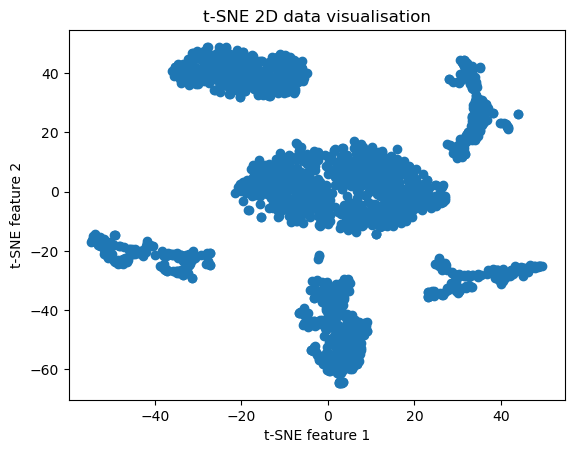

In [17]:
# Plot the 2D representation - filtered data
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE 2D data visualisation')
plt.savefig('fig/tSNE_2D_data.png', dpi=300)  
plt.show()

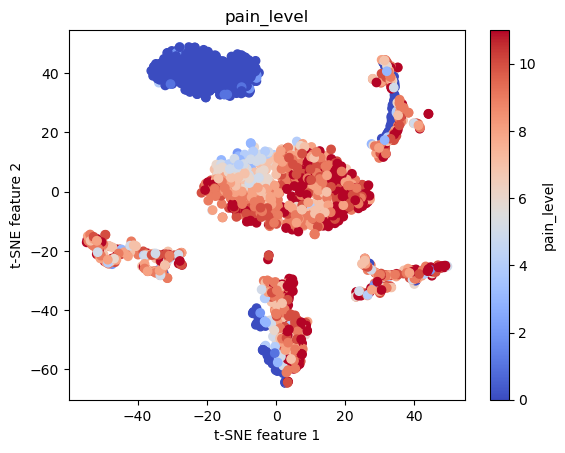

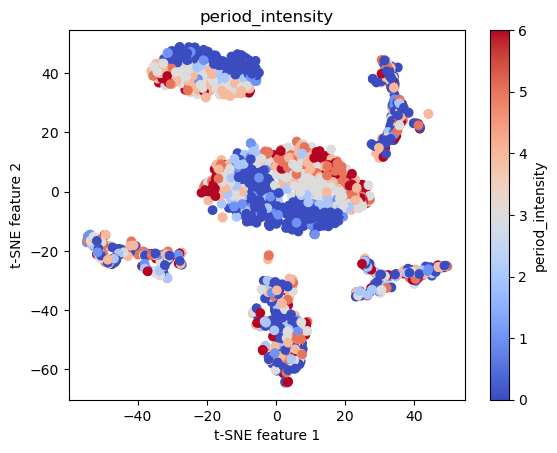

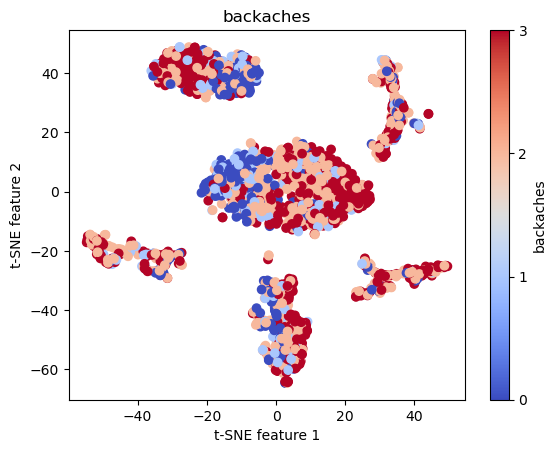

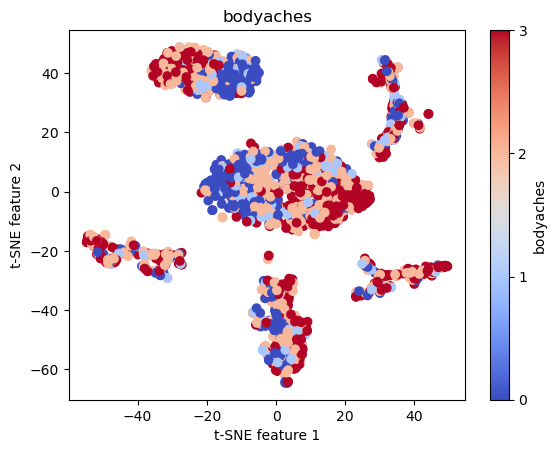

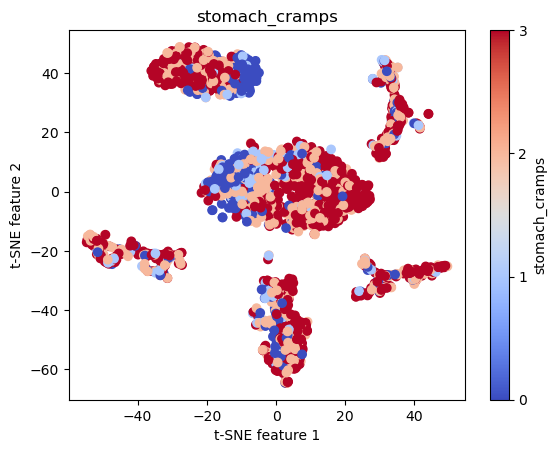

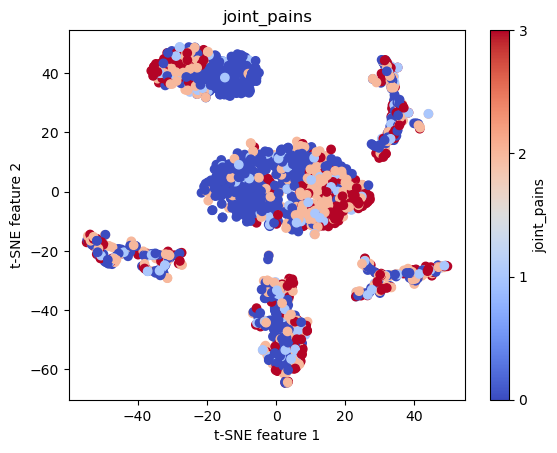

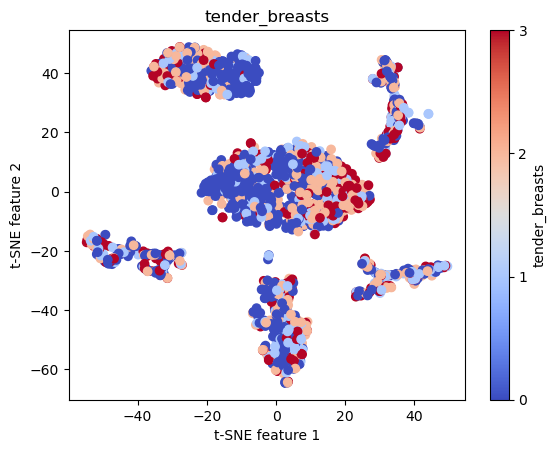

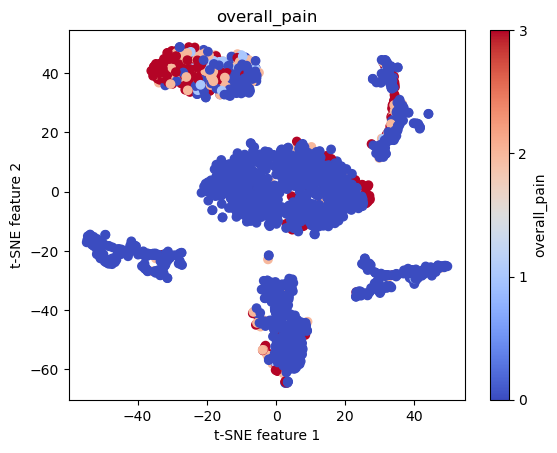

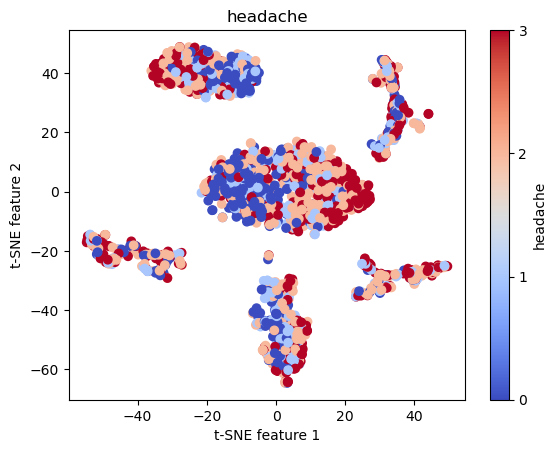

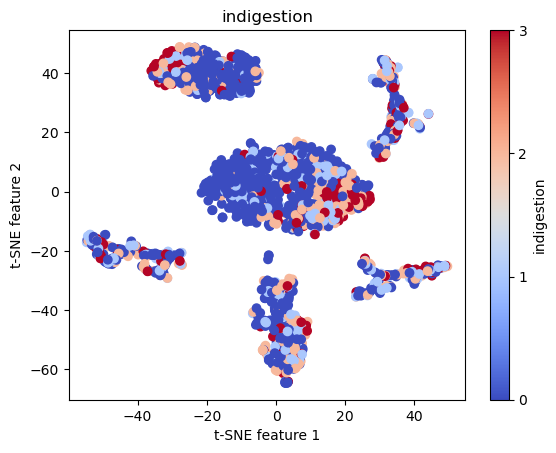

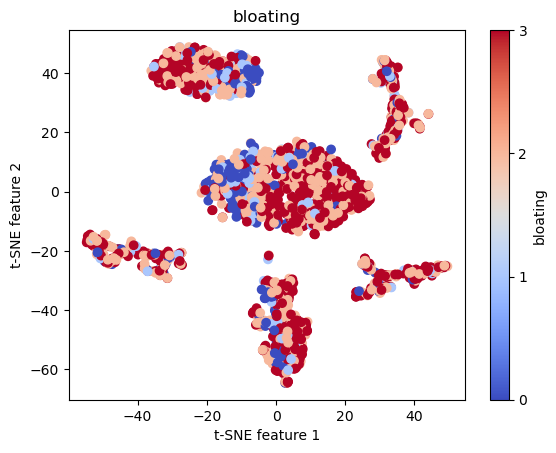

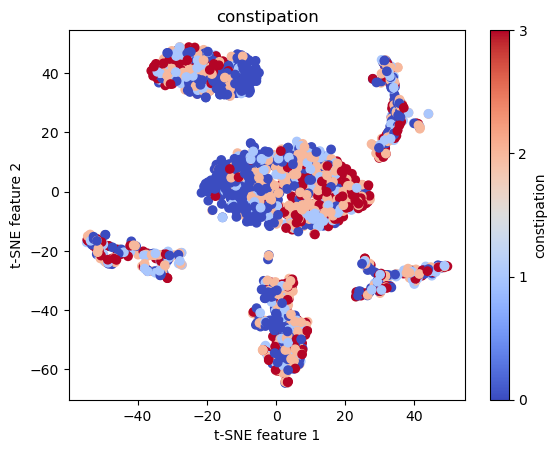

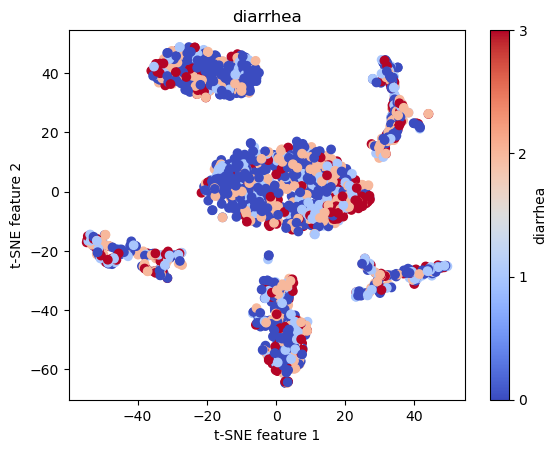

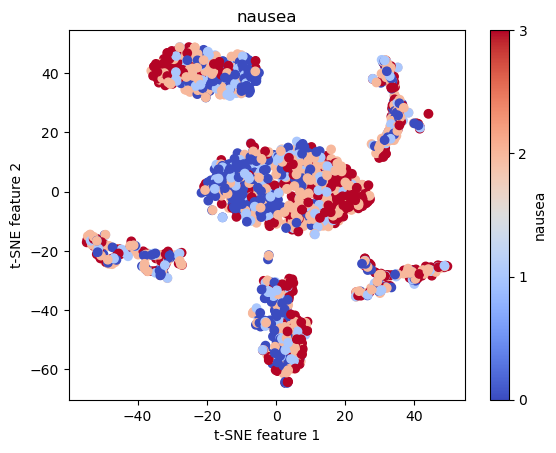

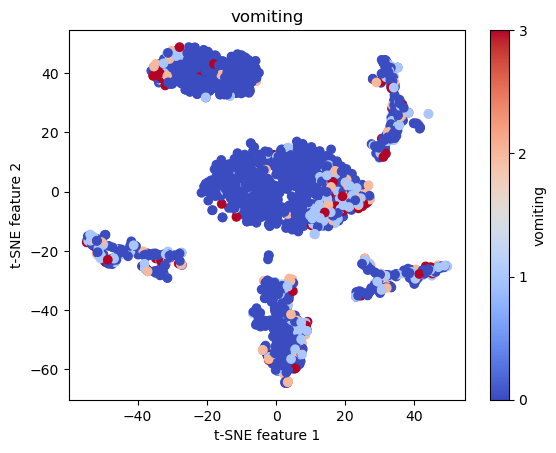

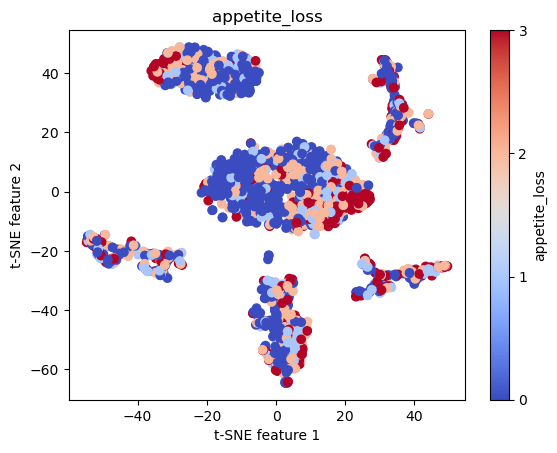

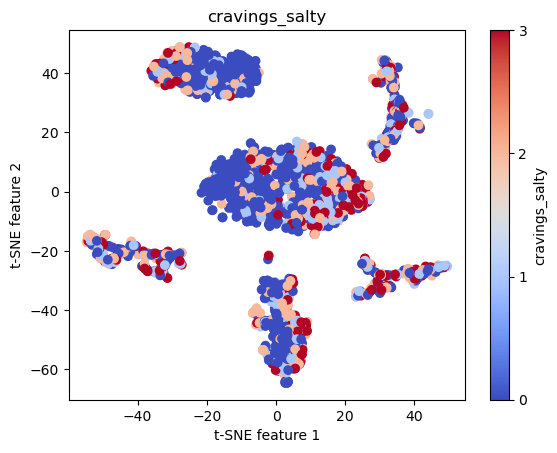

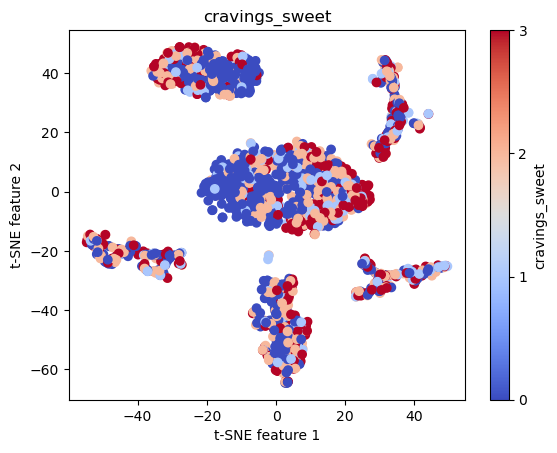

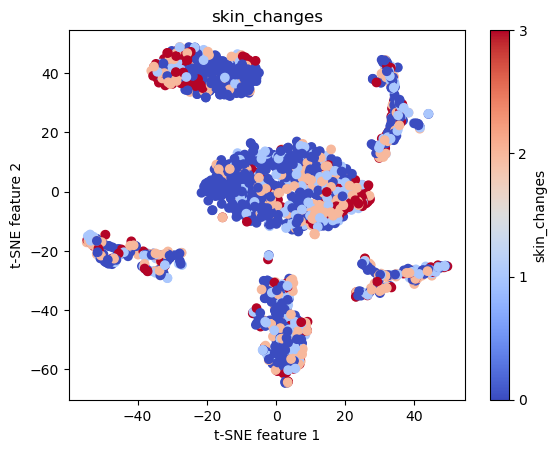

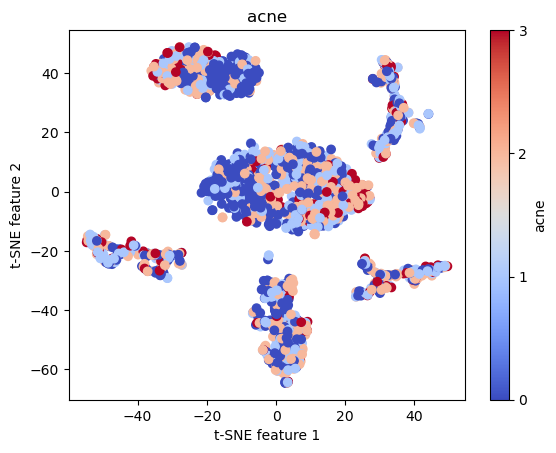

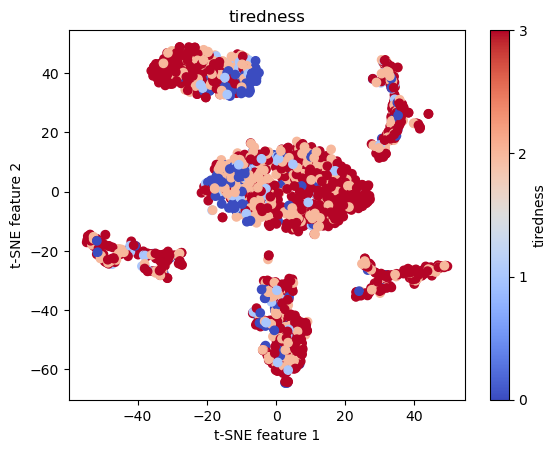

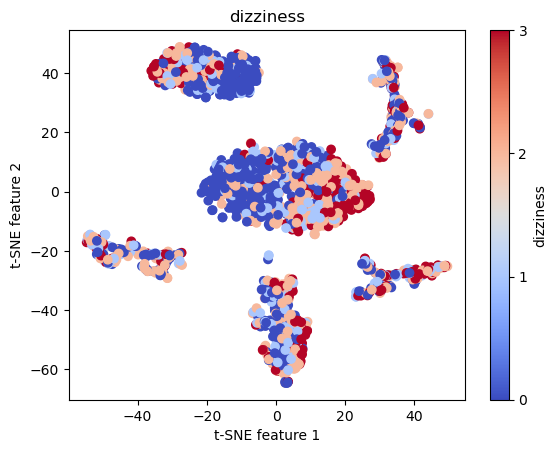

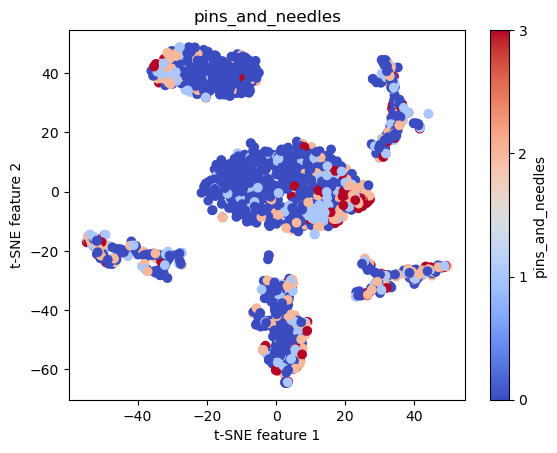

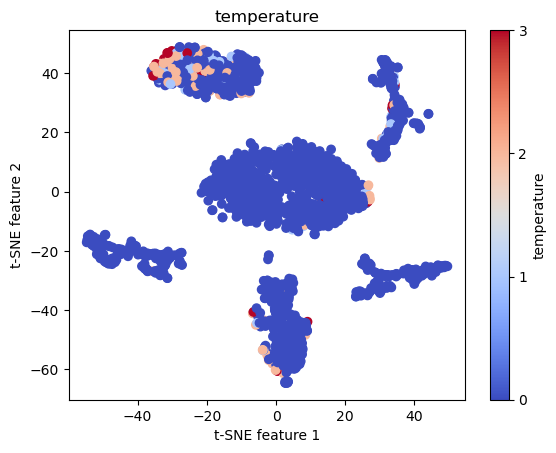

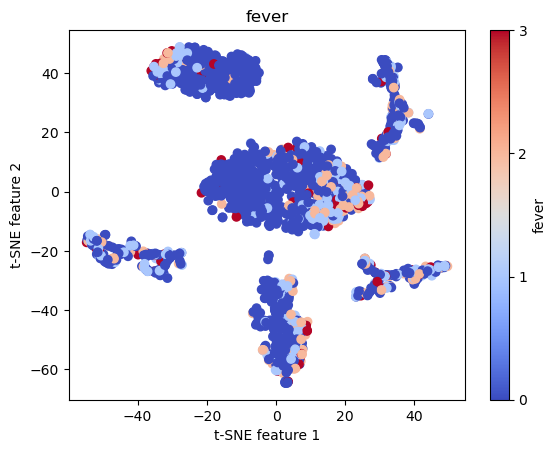

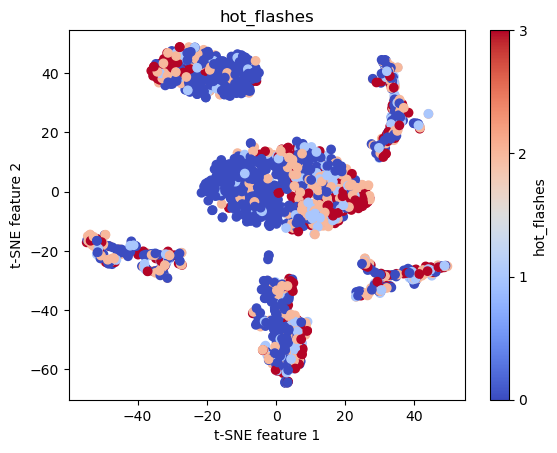

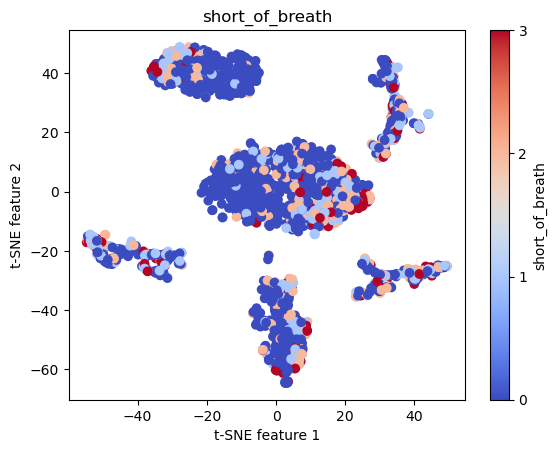

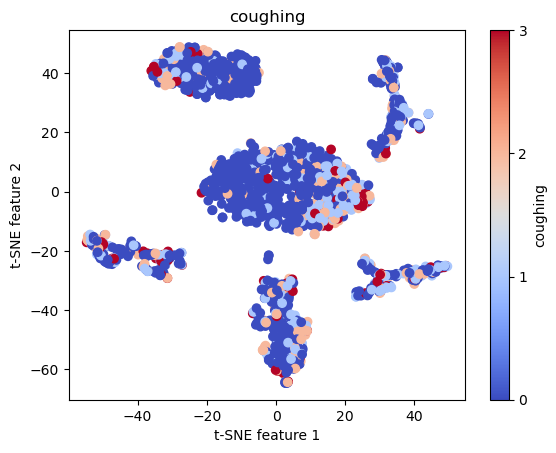

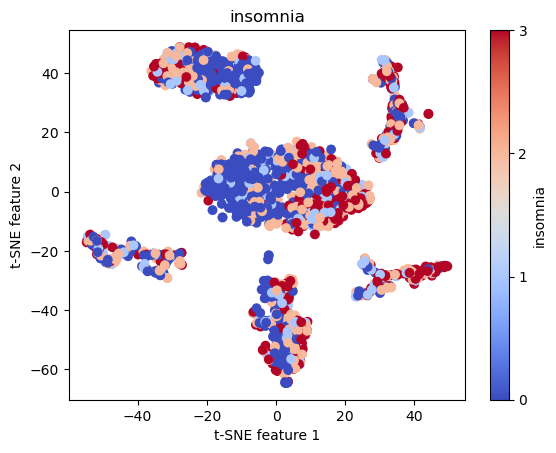

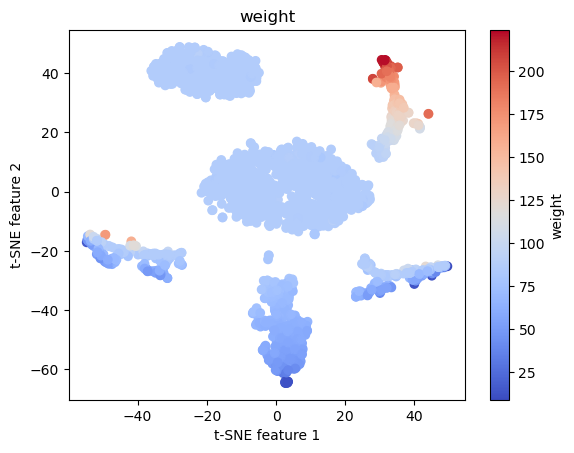

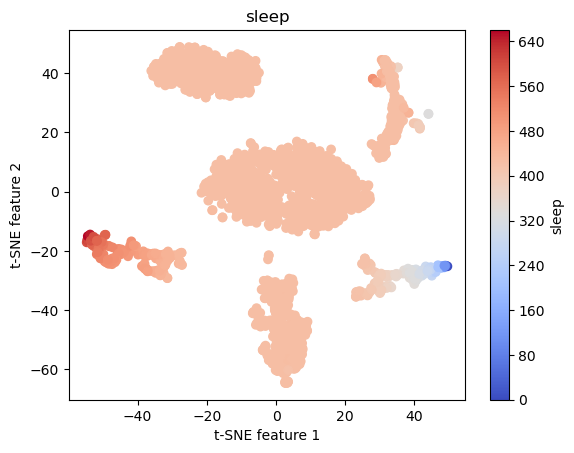

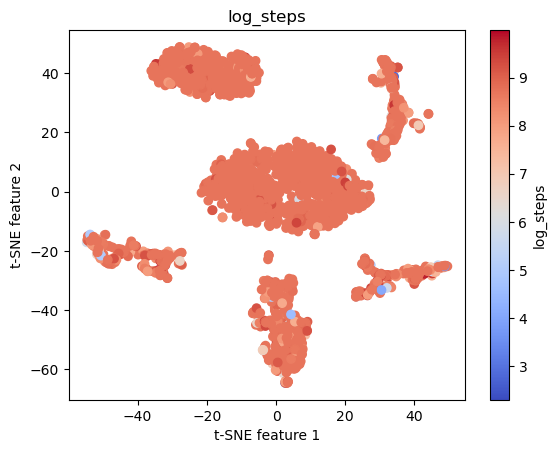

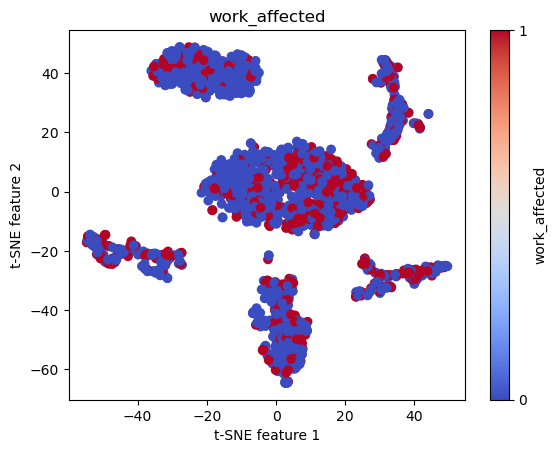

In [18]:
# Colour coded plot the 2D representation 
# Iterate over variables of interest

variables = ['pain_level', 'period_intensity', 'backaches', 'bodyaches', 'stomach_cramps', 'joint_pains', 'tender_breasts', 
            'overall_pain','headache', 'indigestion', 'bloating', 'constipation', 'diarrhea', 'nausea', 'vomiting', 
            'appetite_loss', 'cravings_salty', 'cravings_sweet', 'skin_changes', 'acne', 'tiredness', 'dizziness', 
            'pins_and_needles', 'temperature', 'fever', 'hot_flashes', 'short_of_breath', 'coughing', 'insomnia',
             'weight', 'sleep', 'log_steps', 'work_affected']

for var in variables:
    variable = agg_df[var]
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=variable, cmap='coolwarm')
    cbar = plt.colorbar(scatter, label=f'{var}')
    cbar.locator = ticker.MaxNLocator(integer=True)
    cbar.update_ticks()
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.title(f'{var}')
    plt.savefig(f'fig/tSNE_{var}.png', dpi=300)  
    plt.show()

In [19]:
# Read in cluster labels from GLRM & K-means clustering
file_path = 'data/cluster_labels.csv'
cluster_labels = pd.read_csv(file_path)
# Add 1 to each cluster number to rename clusters 1-4 for scale
cluster_labels['predict'] = cluster_labels['predict'] + 1
print(cluster_labels.shape)
cluster_labels['predict'].value_counts()

(1918, 1)


predict
1    570
2    485
4    454
3    409
Name: count, dtype: int64

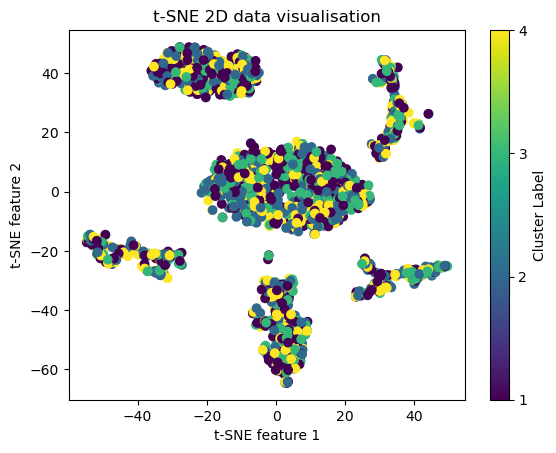

In [20]:
# Plot the 2D representation - filtered data
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=cluster_labels['predict'], cmap='viridis')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE 2D data visualisation')
cbar = plt.colorbar(label='Cluster Label')
cbar.locator = ticker.MaxNLocator(integer=True)
cbar.update_ticks()
plt.savefig('fig/tSNE_2D_clustered_data.png', dpi=300)  
plt.show()